# 数据挖掘 - 聚类算法

- 姓名： 魏大峰  
- 学号： 11803991xxxxx
- 院系： 电院-微纳电子学系  

采用首先回顾了聚类算法的基本思路，然后选取最常用的kmeans聚类、自底向上凝聚聚类两类算法，逐一介绍、实现。  
包括算法原理、聚类簇数选取（手动法、自动法——手肘法、树状结构图法） 结果分析、可视化展示。  

通过本次作业，结合老师的课堂讲授，也查阅了很多资料，更深刻的理解了算法原理，同时在编程实现过程中，见识了聚类算法在数据分析上的强大功能。


---  
先看下人工选取k值的动态图：   
![image](https://i.loli.net/2019/04/06/5ca865e4c6776.gif)

## 聚类基本概念  
聚类是一种无监督分类法: 没有预先指定的类别，把一个给定的数据对象集合分成不同的簇  

常用的有`K-means聚类`、`凝聚层次聚类`、`分散层次聚类`等 


### kmeans聚类算法原理  
kmeans的计算方法如下：

1. 随机选取k个中心点    
2. 遍历所有数据，计算没过数据点到中心点的距离，将每个数据划分到最近（距离最小）的中心点中  
3. 计算每个聚类的平均值，并该平均值点作为新的中心点  
4. 重复2-3，直到这k个中心点不再变化（收敛了），或执行了足够多的迭代  
5. 结束，得到k个聚类  
- 时间复杂度：O(I*n*k*m)  
- 空间复杂度：O(n*m)

其中m为每个元素字段个数，n为数据量，I为迭代次数数。  
一般I,k,m均可认为是常量，所以时间和空间复杂度可以简化为O(n)，即**线性的**。  
**优点：**   
速度快，计算简便  
**缺点： **
必须提前知道数据有多少类/组，而很多时候不知道，只能多次调整、比较效果  
![kmeans聚类](https://ask.qcloudimg.com/http-save/yehe-1000017/7vds5cgcun.gif)  
<center> kmeans聚类算法示意图 </center>
 

In [2]:
import numpy as np
import pandas as pd #加载数据

import matplotlib.pyplot as plt  # 可视化
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['figure.dpi'] = 300 #提高分辨率

本文所选数据集为超市顾客信息，包括序号、性别、年龄、年收入、消费指数等五个维度、共200条数据

In [3]:
rd=pd.read_csv('Mall_Customers.csv') # 加载数据
# rd[:5] # 打印前五行
rd.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X=rd.iloc[:,[3,4]].values  # integer-location 选择第4、5列数据——聚类依据（年收入、消费能力）
print(X[:5])  # 打印出前五行

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [4]:
# 生成随机颜色
import random  
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color
randomcolor()

'#A9F3F4'

In [5]:
'''
===========================kmeans参数说明： ==============================================================
KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
        
（1）n_cluster：给定类别的个数，默认值为8,一般需要多试一些值以获得较好的聚类效果； 
（2）max_iter：迭代的次数，这里设置最大迭代次数为300； 
（3）n_init,用不同的初始化质心运行算法的次数，默认为10意味着进行10次随机初始化，选择效果最好的一种来作为模型，
    由于K-Means是结果受初始值影响的局部最优的迭代算法，因此需要多跑几次以选择一个较好的聚类效果； 
（4）init，即初始值选择的方式，可以为完全随机选择'random'、优化过的'k-means++'，或者自己指定初始化的k个质心。
    默认为k-means++，会由程序自动寻找合适的n_clusters； 
（5）tol：float形，默认值= 1e-4，与inertia结合来确定收敛条件； 
（6）n_jobs：指定计算所用的进程数； 
（7）verbose 参数设定打印求解过程的程度，值越大，细节打印越多； 
（8）copy_x：布尔型，默认值=True。当我们precomputing distances时，将数据中心化会得到更准确的结果。
    如果把此参数值设为True，则原始数据不会被改变。如果是False，则会直接在原始数据上做修改并在函数返回值时将其还原。
    但是在计算过程中由于有对数据均值的加减运算，所以数据返回后，原始数据和计算前可能会有细小差别。
（9）algorithm：有“auto”, “full” or “elkan”三种选择。"full"就是传统的K-Means算法，
    “elkan”是elkan K-Means算法。默认的"auto"则会根据数据值是否是稀疏的，来决定如何选择"full"和“elkan”。
    一般数据是稠密的，那么就是 “elkan”，否则就是"full"。
================================================================================================================
'''
print(__doc__)



===========================kmeans参数说明： ==============================================================
KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
        
（1）n_cluster：给定类别的个数，默认值为8,一般需要多试一些值以获得较好的聚类效果； 
（2）max_iter：迭代的次数，这里设置最大迭代次数为300； 
（3）n_init,用不同的初始化质心运行算法的次数，默认为10意味着进行10次随机初始化，选择效果最好的一种来作为模型，
    由于K-Means是结果受初始值影响的局部最优的迭代算法，因此需要多跑几次以选择一个较好的聚类效果； 
（4）init，即初始值选择的方式，可以为完全随机选择'random'、优化过的'k-means++'，或者自己指定初始化的k个质心。
    默认为k-means++，会由程序自动寻找合适的n_clusters； 
（5）tol：float形，默认值= 1e-4，与inertia结合来确定收敛条件； 
（6）n_jobs：指定计算所用的进程数； 
（7）verbose 参数设定打印求解过程的程度，值越大，细节打印越多； 
（8）copy_x：布尔型，默认值=True。当我们precomputing distances时，将数据中心化会得到更准确的结果。
    如果把此参数值设为True，则原始数据不会被改变。如果是False，则会直接在原始数据上做修改并在函数返回值时将其还原。
    但是在计算过程中由于有对数据均值的加减运算，所以数据返回后，原始数据和计算前可能会有细小差别。
（9）algorithm：有“auto”, “full” or “elkan”三种选择。"full"就是传统的K-Means算法，
    “elkan”是elkan K-Means算法。默认的"auto"则

In [6]:
#从机器学习库sklearn导入kmeans聚类模块
from sklearn.cluster import KMeans 

### 手动调类别数   
刚开始是手工指定k值，但一次一次太慢了，就放在for循环里，所以是半手动


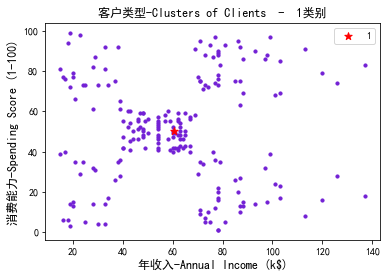

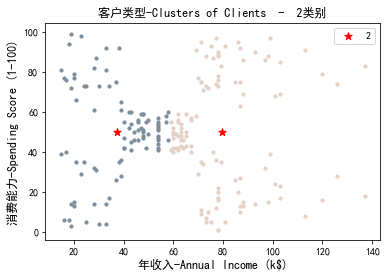

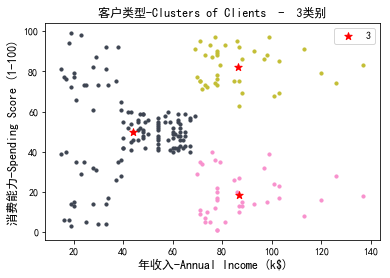

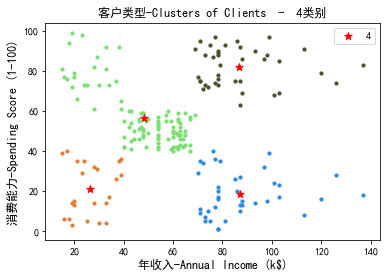

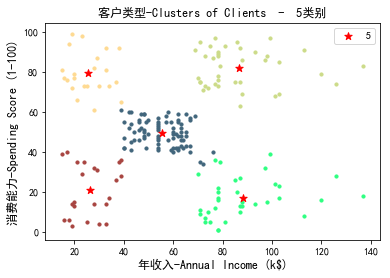

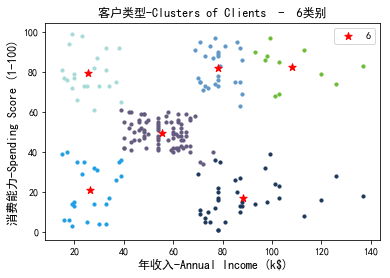

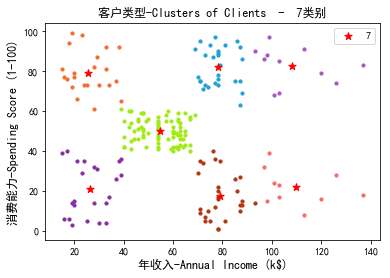

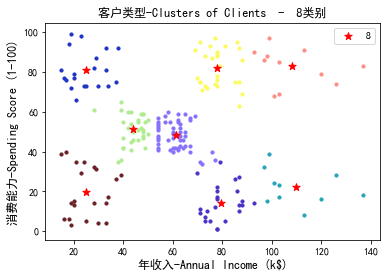

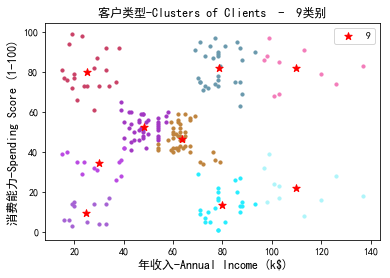

In [7]:
def plot_n_clusters(n):
    # 调用kmeans方法 —— 关键是指定类别
    kmean = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,random_state=0)

    #计算聚类中心并预测每个样本的聚类索引
    y_mean=kmean.fit_predict(X) 
    # print("\ny_mean = {}\n,y_mean.shape = {}\n".format(y_mean,y_mean.shape))

    plt.scatter(X[y_mean == 0,0], X [y_mean == 0,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 1,0], X [y_mean == 1,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 2,0], X [y_mean == 2,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 3,0], X [y_mean == 3,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 4,0], X [y_mean == 4,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 5,0], X [y_mean == 5,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 6,0], X [y_mean == 6,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 7,0], X [y_mean == 7,1], s = 10, c= randomcolor())
    plt.scatter(X[y_mean == 8,0], X [y_mean == 8,1], s = 10, c= randomcolor())

    plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=60,marker = "*", c = "r",label='%d'%n)
    plt.title('客户类型-Clusters of Clients  -  %d类别'%n,fontsize = 12)
    plt.xlabel('年收入-Annual Income (k$)',fontsize = 12)
    plt.ylabel('消费能力-Spending Score (1-100)',fontsize = 12)
    plt.legend()
    plt.show()
#     plt.savefig("%d  -  clusters"%n,dpi= 300)
    
for i in range(1,10):
    plot_n_clusters(i)

### 自动获取类别数  
评价标准：WCSS  
聚类内平方和（Within-Cluster Sum-of-Squares）可以测量每个聚类内的方差。聚类越好，整体 WCSS 就越低。可以看到，手动调节费事费力，即便在这么小的数据集、利用for循环，仍需不少精力。

因此有必有采用一种自动的方法，比较直观地获取kmeans的类别数——**手肘法**  
#### 手肘法思路  
> 随着聚类数k的增大，样本划分会更加精细，每个簇的聚合程度会逐渐提高，那么类内平方和wcss自然会逐渐变小。    
> 当k小于真实聚类数时，由于k的增大会大幅增加每个簇的聚合程度，故wcss的下降幅度会很大，而当k到达真实聚类数时，再增加k所得到的聚合程度回报会迅速变小，所以wcss的下降幅度会骤减，然后随着k值的继续增大而趋于平缓，也就是说wcss和k的关系图是一个手肘的形状，而这个肘部对应的k值就是数据的真实聚类数


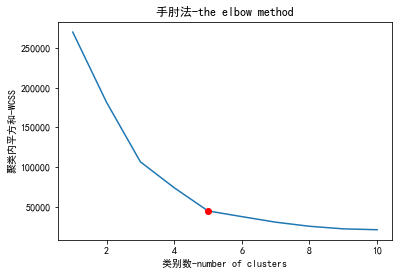

In [8]:
# 手肘法 确定类别数
result=[]  # 存储聚类内平方和wcss（Within-Cluster Sum-of-Squares），测量每个聚类内的方差。聚类越好，整体 WCSS 就越低。

# 因为聚类簇数是k-means的关键，人工选取费时费力，所以采用**手肘法**，自动选取最优的K值
for i in range(1,11):  #自动遍历1-10类这几种情况
    kmean=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300,random_state=0)
    kmean.fit(X)
    #compute sum of square in cluster we are using kmean.inertia_
    result.append(kmean.inertia_)  # inertia_是K-Means模型对象的属性，它作为没有真实分类结果标签下的非监督式评估指标。表示样本到最近的聚类中心的距离总和。值越小越好，越小表示样本在类间的分布越集中。

plt.plot(range(1,11), result )
plt.plot(5,result[4],'ro',label = "拐点")
plt.title('手肘法-the elbow method')
plt.xlabel('类别数-number of clusters')
plt.ylabel('聚类内平方和-WCSS',)
# plt.show()
plt.savefig('聚类作业-kmeans-手肘图.png')


从上面的手肘图，可以很直观地看出，当类别数 `n=5` 时，WCSS图有一个很明显的拐点：  
- 在拐点之前，类内误差快速下降，速率很大 ；   
- 在拐点之后，类内误差虽有下降，但速率很小  

也就是说， `n=5` 是最合适的类别数！  
###  调用kmeans方法,指定类别=5


y_mean = [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
,y_mean.shape = (200,)



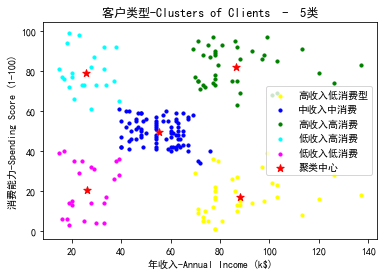

In [9]:
# 调用kmeans方法,指定类别=5
kmean = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300,random_state=0)

#计算聚类中心并预测每个样本的聚类索引
y_mean=kmean.fit_predict(X) 
print("\ny_mean = {}\n,y_mean.shape = {}\n".format(y_mean,y_mean.shape))

plt.scatter(X[y_mean == 0,0], X [y_mean == 0,1], s = 10, c='yellow',label='高收入低消费型')
plt.scatter(X[y_mean == 1,0], X [y_mean == 1,1], s = 10, c='blue',  label='中收入中消费')
plt.scatter(X[y_mean == 2,0], X [y_mean == 2,1], s = 10, c='green', label='高收入高消费')
plt.scatter(X[y_mean == 3,0], X [y_mean == 3,1], s = 10, c='cyan',  label='低收入高消费')
plt.scatter(X[y_mean == 4,0], X [y_mean == 4,1], s = 10, c='magenta', label='低收入低消费')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=60,marker="*", c='red',label='聚类中心')
plt.title('客户类型-Clusters of Clients  -  5类')
plt.xlabel('年收入-Annual Income (k$)')
plt.ylabel('消费能力-Spending Score (1-100)')
plt.legend()
plt.show()


查看此时顾客信息数据，完全匹配，说明算法正确

In [10]:
X[y_mean==0,0]  # 获取横坐标——年收入

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [11]:
X[y_mean==0,1]  # 获取纵坐标——购买能力

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

---

## 分散层次聚类算法原理   
层次聚类算法分为两类：自上而下和自下而上。    
最根本的方法就是集聚（agglomerative）过程，通过该过程，我们从单个数据点开始迭代，将数据点聚合到一起，直到成为一个大型的聚类（自底向上）    
![凝聚层次聚类](https://ask.qcloudimg.com/http-save/yehe-1000017/kgigatyws8.gif)  
<center>自底向上聚类算法示意图 </center>  


另外一种（更高计算量）的方法从巨型聚类开始，然后将数据分解为更小的聚类，直到独立数据点  （自顶向下）。  
![分散层次聚类](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1554533277035&di=02faf942f879b837a4b28cf1982daec6&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180111%2F6f03b276537d4c38a09fe7239a1c5d0b.jpeg)  
<center> 自顶向下聚类算法示意图 </center>


这里以自底向上为例，首先将每个数据点视为一个单一的簇，然后计算所有簇之间的距离来合并簇，知道所有的簇聚合成为一个簇为止。  

**具体步骤： **  
1. 首先我们将每个数据点视为一个单一的簇，然后选择一个测量两个簇之间距离的度量标准。例如我们使用average linkage作为标准，它将两个簇之间的距离定义为第一个簇中的数据点与第二个簇中的数据点之间的平均距离。   
2. 在每次迭代中，我们将两个具有最小average linkage的簇合并成为一个簇——总类减一。   
3. 重复步骤2知道所有的数据点合并成一个簇，然后选择我们需要多少个簇。   
层次聚类优点：  
（1）不需要知道有多少个簇   
（2）对于距离度量标准的选择并不敏感   
缺点：效率低  



同样的，除了**手肘法**，我们也可以利用scipy库中的dendrogram方法，绘制树状结构图，帮助我们找到最佳的类别数  

Dendrogram：依次将符合条件的类相连，最后得到使算法与数据均形象化的树状结构图。
Dendrogram专门用来描述经层次聚类算法得到的结果。  
参照[scipy官方示例](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html)，可以绘制系统树图。

> dendrogram= sch.dendrogram(sch.linkage(X, method='ward')) 

关于评价方法method，可以选择欧式距离，欧式平方，manhattan距离等，  
还有一些方法可以算类（cluster）与类之间的距离，如single-linkage、complete-linkage、以及 ward linkage（即最短最长平均，离差平方和）  

其中ward方法，可以这样理解：  
1）将每个样品各自成一组  
2）每次通过合并减少一组  
3）此时离差平方和出现并逐步增大，选择使离差平方和增加最小的两组合并，知道所有的样品归为一类为止


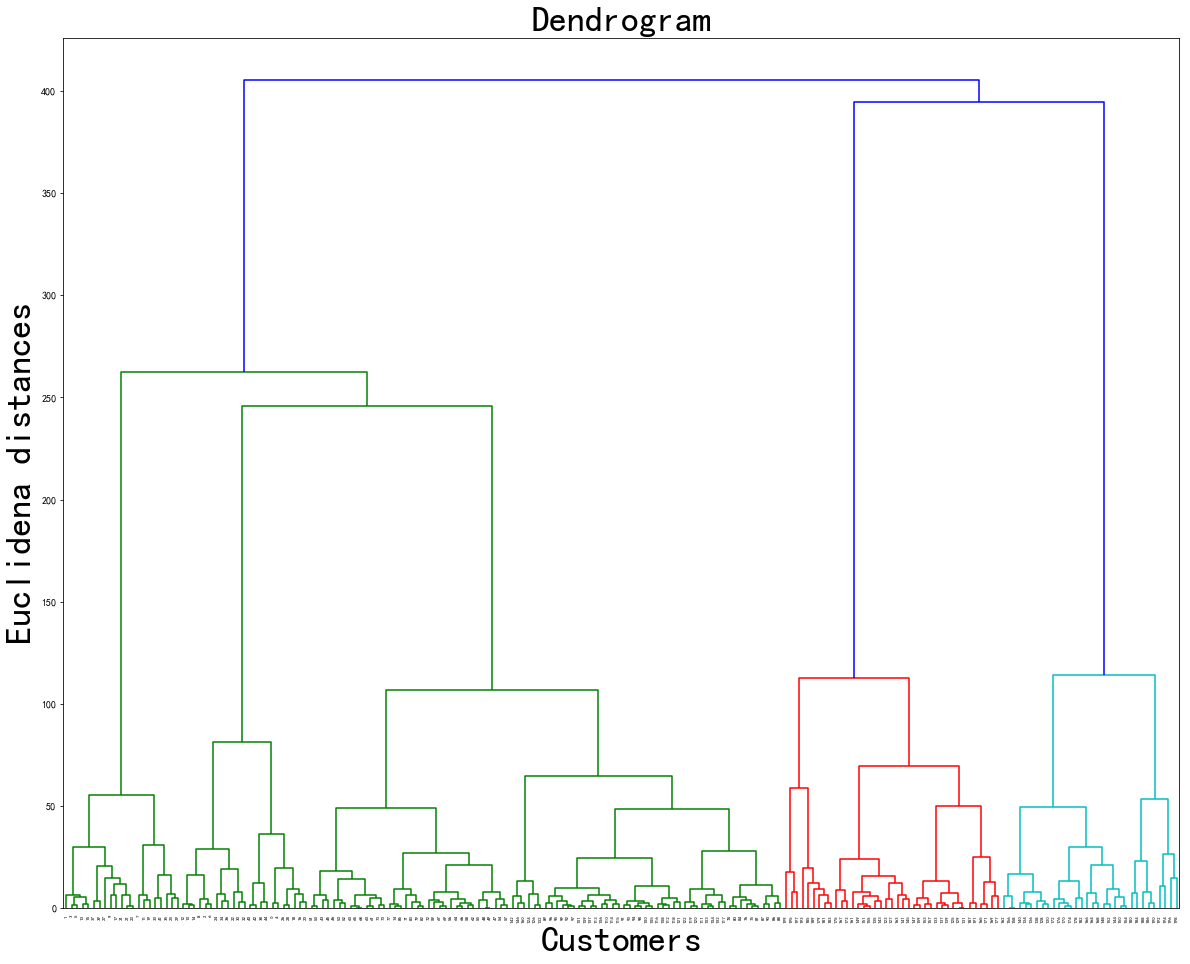

In [12]:
# 因为树状图原始数据太多（200个），横坐标显示不完，所以设置图片尺寸
plt.rcParams['figure.figsize'] = (20, 16) # 设置figure_size尺寸  

import scipy.cluster.hierarchy as sch  # 树状图
dendrogram= sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrogram',fontsize=36)
plt.xlabel('Customers',fontsize=36)
plt.ylabel('Euclidena distances',fontsize=36)
# plt.show()  
plt.savefig('树状层级图-直观获取最佳类别数.png', dpi=100)


从上图可以很直观地看出，我们可以选择5类，与我们用手肘法得到的结果一致  
然后就可以利用自底向上的方法聚类  
Agglomerative Clutsering 是一种自底而上的层次聚类方法，它能够根据指定的相似度或距离定义计算出类之间的距离。  
    
### Agglomerative Clustering Algorithm
1. 将每一个元素单独定为一类  
2. 重复：每一轮都合并指定距离(对指定距离的理解很重要)最小的类  
3. 直到所有的元素都归为同一类    

**参数：  **
AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward')  
- n_clusters：一个整数，指定分类簇的数量  
- connectivity：一个数组或者可调用对象或者None，用于指定连接矩阵  
- affinity：一个字符串或者可调用对象，用于计算距离。可以为：’euclidean’，’l1’，’l2’，’mantattan’，’cosine’，’precomputed’，如果linkage=’ward’，则affinity必须为’euclidean’  
- memory：用于缓存输出的结果，默认为不缓存  
- compute_full_tree：通常当训练了n_clusters后，训练过程就会停止，但是如果compute_full_tree=True，则会继续训练从而生成一颗完整的树  
- linkage：一个字符串，用于指定链接算法   
- ‘ward’：单链接single-linkage，采用dmindmin  
- ‘complete’：全链接complete-linkage算法，采用dmaxdmax  
- ‘average’：均连接average-linkage算法，采用davgdavg  


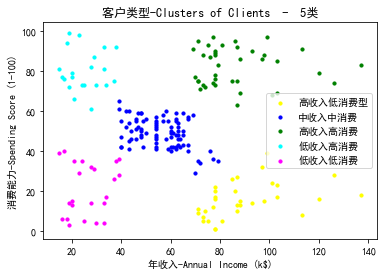

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage='ward')
y_hc=hc.fit_predict(X)

plt.scatter(X[y_hc == 0,0], X [y_hc == 0,1], s = 10, c='yellow',label='高收入低消费型')
plt.scatter(X[y_hc == 1,0], X [y_hc == 1,1], s = 10, c='blue',  label='中收入中消费')
plt.scatter(X[y_hc == 2,0], X [y_hc == 2,1], s = 10, c='green', label='高收入高消费')
plt.scatter(X[y_hc == 3,0], X [y_hc == 3,1], s = 10, c='cyan',  label='低收入高消费')
plt.scatter(X[y_hc == 4,0], X [y_hc == 4,1], s = 10, c='magenta', label='低收入低消费')

# plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=60,marker="*", c='red',label='聚类中心')
plt.title('客户类型-Clusters of Clients  -  5类')
plt.xlabel('年收入-Annual Income (k$)')
plt.ylabel('消费能力-Spending Score (1-100)')
plt.legend()
plt.show()
